# Likelihood of Students Passing depending on the Number of Hours they Studied

In [38]:
#import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from scipy.special import expit  # Sigmoid function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Load dataset
df = pd.read_csv('/kaggle/input/student-record/student_pass.csv')
df.head()

,Student,Hours_Studied,Pass
0,1,6.39,1
1,2,0.25,0
2,3,2.23,1
3,4,6.77,1
4,5,8.92,1


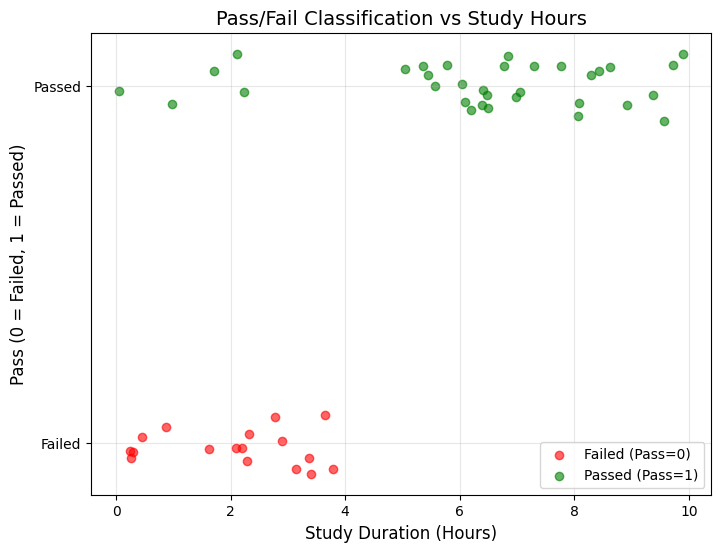

In [40]:
#Visualize the dataset
jitter = 0.1
pass_with_jitter = df['Pass'] + np.random.uniform(-jitter, jitter, size=len(df))

# Create scatter plot with reversed axes
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours_Studied'][df['Pass'] == 0], pass_with_jitter[df['Pass'] == 0], 
            color='red', alpha=0.6, label='Failed (Pass=0)')
plt.scatter(df['Hours_Studied'][df['Pass'] == 1], pass_with_jitter[df['Pass'] == 1], 
            color='green', alpha=0.6, label='Passed (Pass=1)')

# Add labels, title, legend, and ticks
plt.title('Pass/Fail Classification vs Study Hours', fontsize=14)
plt.xlabel('Study Duration (Hours)', fontsize=12)
plt.ylabel('Pass (0 = Failed, 1 = Passed)', fontsize=12)
plt.yticks([0, 1], labels=['Failed', 'Passed'])
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [41]:
#Split the data (train and test)

X_data = df[['Hours_Studied']]
y_data = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [42]:
#Build model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

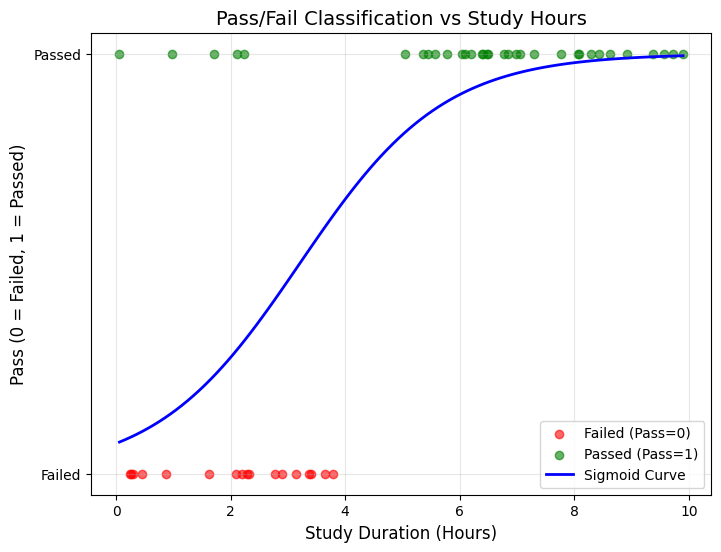

In [43]:
#Plot the sigmoid function line
plt.figure(figsize=(8, 6))

# Scatter plot without jitter
plt.scatter(df['Hours_Studied'][df['Pass'] == 0], df['Pass'][df['Pass'] == 0], 
            color='red', alpha=0.6, label='Failed (Pass=0)')
plt.scatter(df['Hours_Studied'][df['Pass'] == 1], df['Pass'][df['Pass'] == 1], 
            color='green', alpha=0.6, label='Passed (Pass=1)')

# Plot sigmoid function line using sns.regplot
sns.regplot(x='Hours_Studied', y='Pass', data=df, logistic=True, ci=None, 
            scatter=False, line_kws={'color': 'blue', 'lw': 2}, label='Sigmoid Curve')

# Add labels, title, legend, and ticks
plt.title('Pass/Fail Classification vs Study Hours', fontsize=14)
plt.xlabel('Study Duration (Hours)', fontsize=12)
plt.ylabel('Pass (0 = Failed, 1 = Passed)', fontsize=12)
plt.yticks([0, 1], labels=['Failed', 'Passed'])
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [44]:
#Predict probabilities of passing as study hours increase
sample = pd.DataFrame([[0]], columns=['Hours_Studied'])
predicted_result = model.predict(sample)
print("Did the student pass?:", predicted_result)

Did the student pass?: [0]


In [45]:
#Predict probabilities of passing as study hours increase
sample = pd.DataFrame([[10]], columns=['Hours_Studied'])
predicted_result = model.predict(sample)
print("Did the student pass?:", predicted_result)

Did the student pass?: [1]


In [46]:
#Predict probabilities of passing as study hours increase
sample = pd.DataFrame([[5.5]], columns=['Hours_Studied'])
predicted_result = model.predict(sample)
print("Did the student pass?:", predicted_result)

Did the student pass?: [1]


In [47]:
#Predict probabilities of passing as study hours increase
sample = pd.DataFrame([[3]], columns=['Hours_Studied'])
predicted_result = model.predict(sample)
print("Did the student pass?:", predicted_result)

Did the student pass?: [0]


In [48]:
#Predict probabilities of passing as study hours increase
sample = pd.DataFrame([[12]], columns=['Hours_Studied'])
predicted_result = model.predict(sample)
print("Did the student pass?:", predicted_result)

Did the student pass?: [1]
